This Notebook explores the Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico.

The dataset has 2111 records and 17 features. The records are labeled with the class variable "NObesity" (Obesity Level) that allows classification in 7 groups: "Insufficient Weight", "Normal Weight", "Overweight Level I", "Overweight Level II", "Obesity Type I", "Obesity Type II" and "Obesity Type III". The dataset authors note that 23% of the records were collected directly from users through a web platform, and the remaining 77% were generated synthetically with Weka tool and SMOTE filter.

Eating habits, physical activity, and genes are factors which affect person's obesity predisposition. The task here is to explore the dataset, and to find a decent model that would be capable to tell if someone is overweight or obese, or his or her body fits into the normal (health) range

### Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [4]:
df = pd.read_csv(r"F:\Ineuron DS\Assignment\ObesityDataSet_raw_and_data_sinthetic.csv")

In [5]:
## Checking top 5 rows

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
## Checking Rows & Columns Availabale in Dataset

df.shape

(2111, 17)

A brief check confirms the dataset has 2111 rows and 17 columns.

### EDA

In [6]:
## Checking Details Information related with Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
## Checking Null Values

df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

The output above shows that there are not missing values in the DataFrame; half of the features hold numeric (float64) values, and the other half - categorical ones. All are further explored in this Chapter. In general, the dataset is tidy, hence data cleaning was not neccessary

Type casting 'Age' as 'Age' cannot be in float so changing it into int.

In [9]:
df['Age'] = df['Age'].astype(int)

In [10]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

#### Gender 

<BarContainer object of 2 artists>

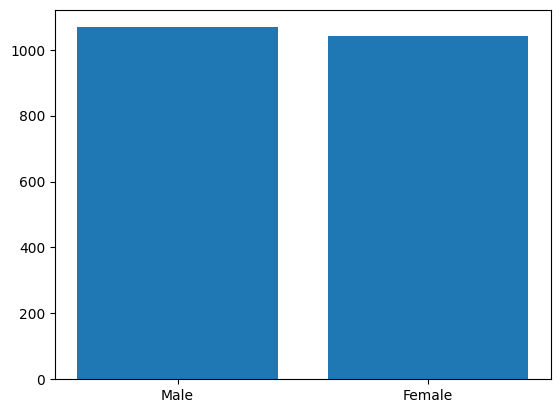

In [35]:
plt.bar(df['Gender'].value_counts().index,df['Gender'].value_counts().values)

#### Age

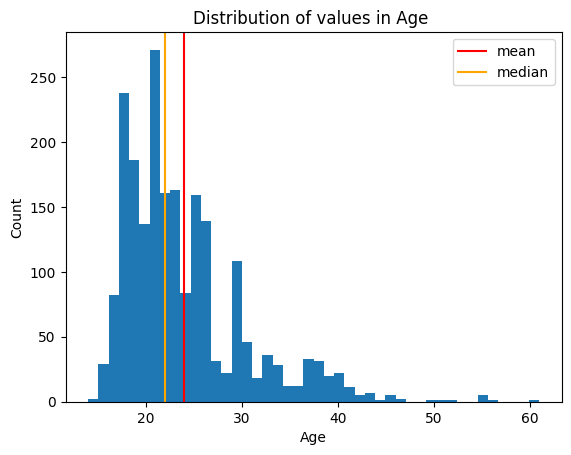

In [50]:
plt.hist(df['Age'], bins = 'fd')
plt.axvline(df['Age'].mean(), color = "red", label = "mean")
plt.axvline(df['Age'].median(), color = "orange", label = "median")

plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.title(f"Distribution of values in Age ")
plt.show()

The youngest person in the dataset is 14 years old, and the oldest one - 61 years of age. Values in this column are not normally distributed; the historgram is positively skewed with mean (24.31) and median (22.78) closer to the lower bound.

#### Height

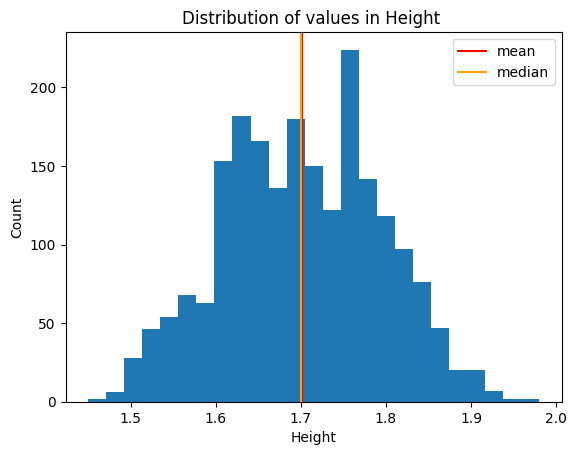

In [52]:
plt.hist(df['Height'], bins = 'fd')
plt.axvline(df['Height'].mean(), color = "red", label = "mean")
plt.axvline(df['Height'].median(), color = "orange", label = "median")

plt.xlabel("Height")
plt.ylabel("Count")
plt.legend()
plt.title(f"Distribution of values in Height ")
plt.show()

Distribution of height values is plotted above. Most people are 1.60 m - 1.85 m tall. Both mean and median values are around 1.70.

#### Weight

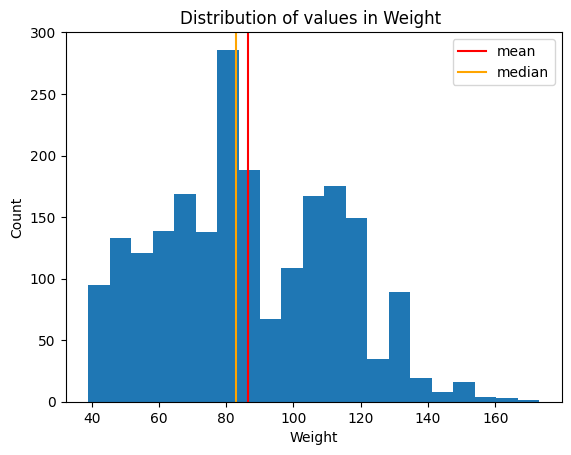

In [54]:
plt.hist(df['Weight'], bins = 'fd')
plt.axvline(df['Weight'].mean(), color = "red", label = "mean")
plt.axvline(df['Weight'].median(), color = "orange", label = "median")

plt.xlabel("Weight")
plt.ylabel("Count")
plt.legend()
plt.title(f"Distribution of values in Weight ")
plt.show()

Distribution is more or less bi-modal, the mean and the median are shifted to the left because of the larger number of people weighting 80 kg.

#### Corelation between Height and Weight 

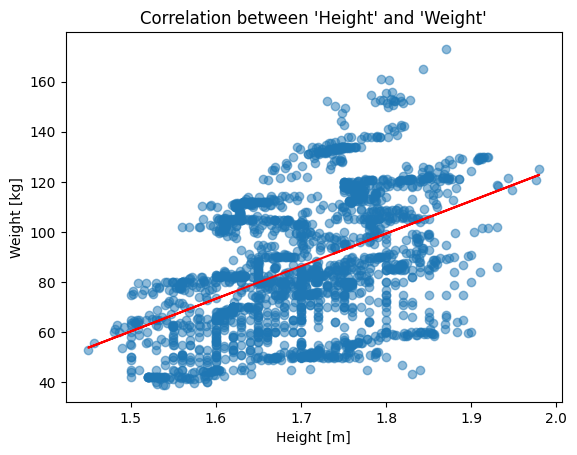

In [61]:
plt.scatter(df['Height'],df['Weight'],alpha = 0.5)

m, kg = np.polyfit(df["Height"], df["Weight"], 1)
plt.plot(df["Height"], m * df["Height"] + kg, color = "red")

plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between 'Height' and 'Weight'")
plt.show()

The red line shows that there is a positive correlation between them, which means an increase in one variable leads to an increase in the other

#### Does overweight run in the family?

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='family_history_with_overweight', ylabel='count'>

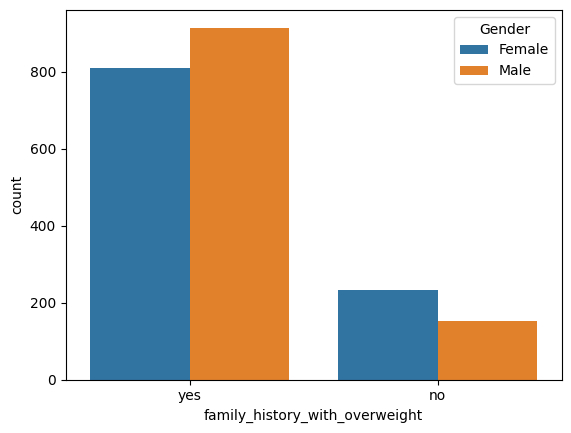

In [63]:
sns.countplot(df['family_history_with_overweight'],hue = df['Gender'])

#### Consumption of high caloric food

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='FAVC', ylabel='count'>

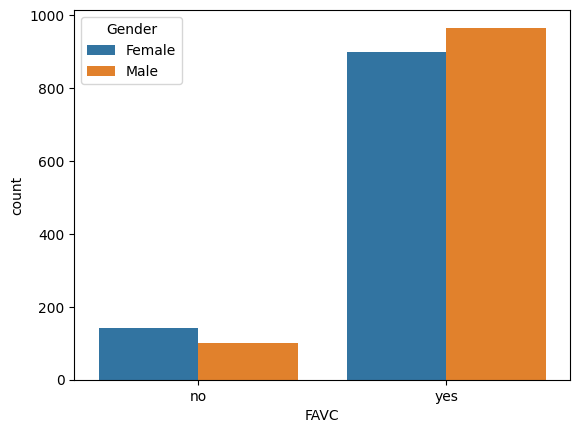

In [64]:
sns.countplot(df['FAVC'],hue = df['Gender'])

#### Consumption of vegetables

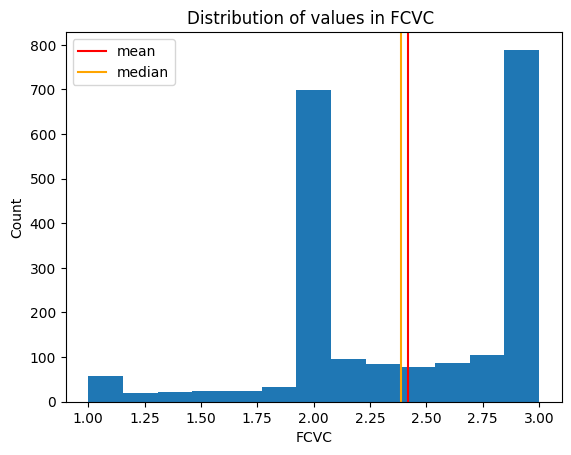

In [70]:
plt.hist(df['FCVC'], bins = 'fd')
plt.axvline(df['FCVC'].mean(), color = "red", label = "mean")
plt.axvline(df['FCVC'].median(), color = "orange", label = "median")

plt.xlabel("FCVC")
plt.ylabel("Count")
plt.legend()
plt.title(f"Distribution of values in FCVC ")
plt.show()

"FCVC" column denotes if people consume vegetables. Possible answers were "Never", "Sometimes", and "Always". It is not clear why values are numeric and not categorical (discrete) ones. It could be assumed that "3" means "Always", "2" - "Sometimes", and "1" - "Never", but it is not clear what the values inbetween mean.

#### Meals per day

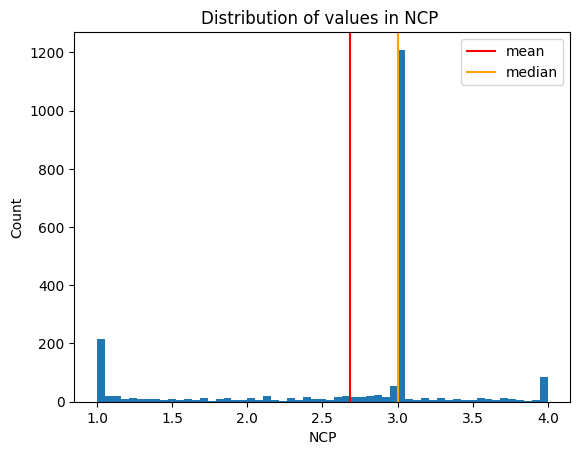

In [72]:
plt.hist(df['NCP'], bins = 'fd')
plt.axvline(df['NCP'].mean(), color = "red", label = "mean")
plt.axvline(df['NCP'].median(), color = "orange", label = "median")

plt.xlabel("NCP")
plt.ylabel("Count")
plt.legend()
plt.title(f"Distribution of values in NCP ")
plt.show()

#### Food between meals

 People had to say if and how offen they eat between meals. "No" (if they do not get bites between regular time for eating), or "Sometimes", "Frequently", or "Always". The data suggests that most people "sometimes" get small snacks between meals.

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='CAEC', ylabel='count'>

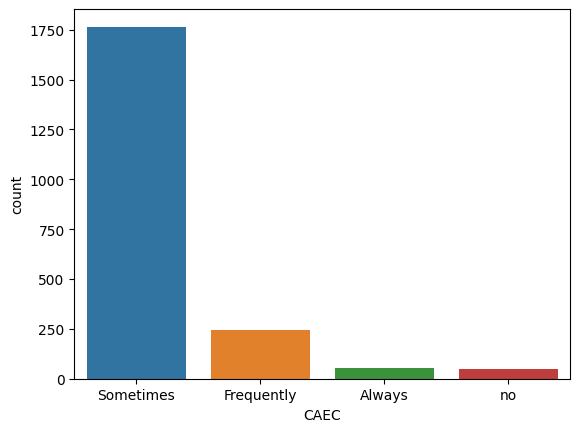

In [73]:
sns.countplot(df['CAEC'])

#### Smoke

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='SMOKE', ylabel='count'>

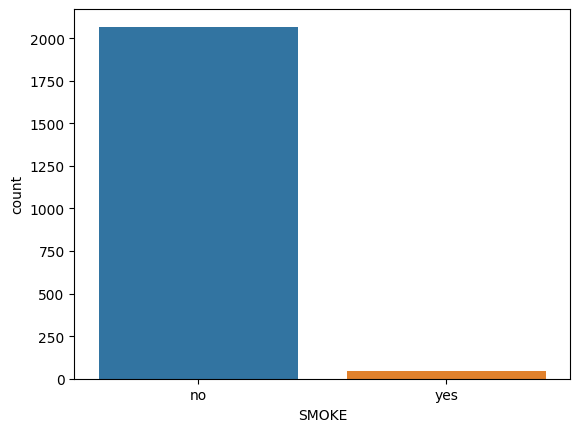

In [74]:
sns.countplot(df['SMOKE'])

#### Drink water

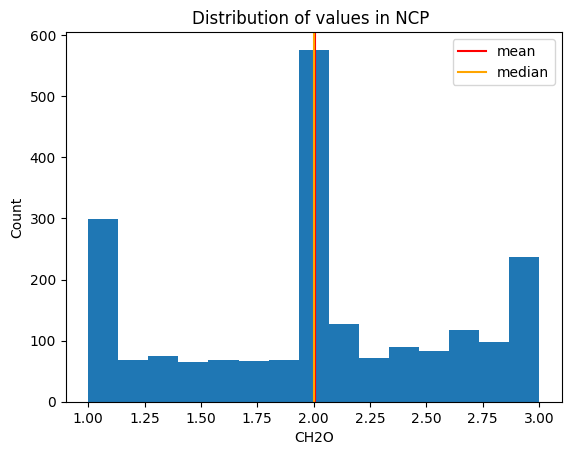

In [75]:
plt.hist(df['CH2O'], bins = 'fd')
plt.axvline(df['CH2O'].mean(), color = "red", label = "mean")
plt.axvline(df['CH2O'].median(), color = "orange", label = "median")

plt.xlabel("CH2O")
plt.ylabel("Count")
plt.legend()
plt.title(f"Distribution of values in NCP ")
plt.show()

#### Monitor intake of calories

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='SCC', ylabel='count'>

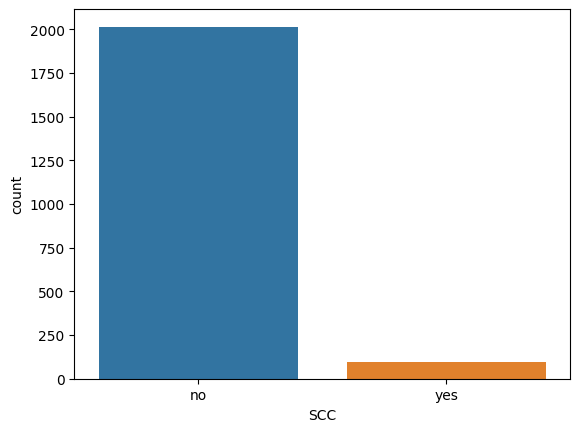

In [76]:
sns.countplot(df['SCC'])

#### Physical activity

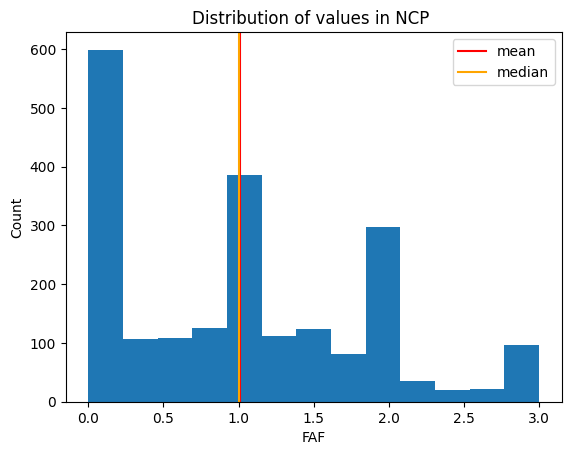

In [77]:
plt.hist(df['FAF'], bins = 'fd')
plt.axvline(df['FAF'].mean(), color = "red", label = "mean")
plt.axvline(df['FAF'].median(), color = "orange", label = "median")

plt.xlabel("FAF")
plt.ylabel("Count")
plt.legend()
plt.title(f"Distribution of values in NCP ")
plt.show()

#### Physical Inactivity

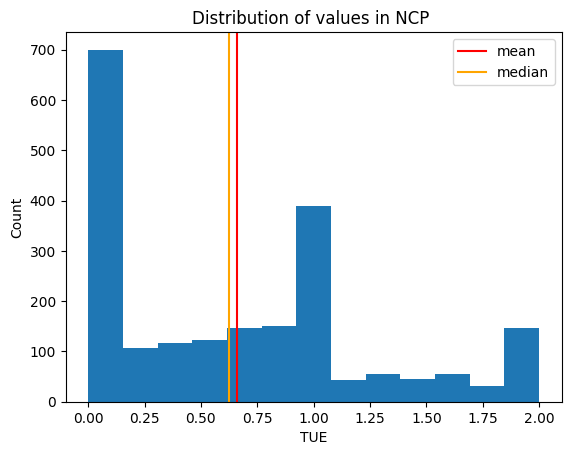

In [80]:
plt.hist(df['TUE'], bins = 'fd')
plt.axvline(df['TUE'].mean(), color = "red", label = "mean")
plt.axvline(df['TUE'].median(), color = "orange", label = "median")

plt.xlabel("TUE")
plt.ylabel("Count")
plt.legend()
plt.title(f"Distribution of values in NCP ")
plt.show()

#### Drink alcohol

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='CALC', ylabel='count'>

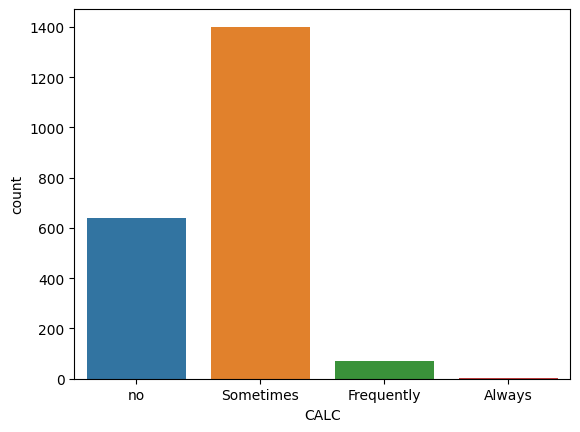

In [81]:
sns.countplot(df['CALC'])

#### Transportation

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='MTRANS', ylabel='count'>

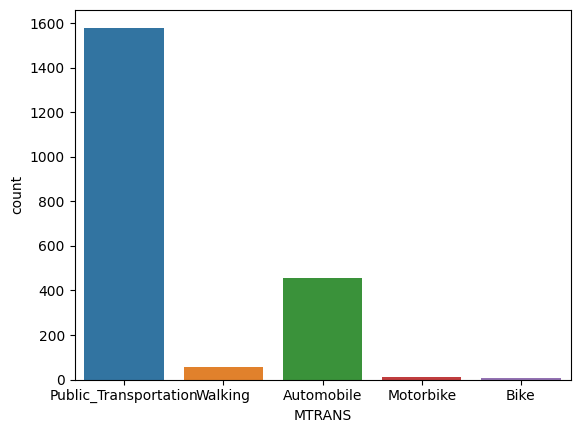

In [82]:
sns.countplot(df['MTRANS'])

#### Overweight and Gender

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='NObeyesdad', ylabel='count'>

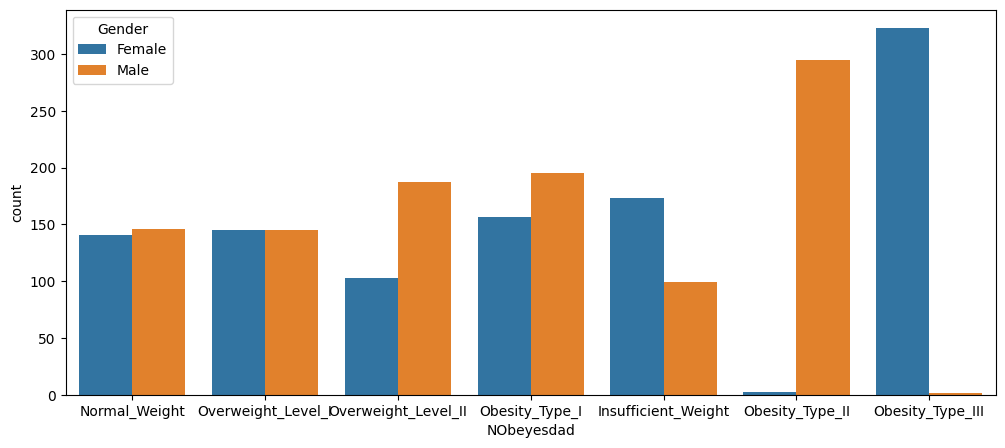

In [90]:
plt.figure(figsize = (12, 5))

sns.countplot(df['NObeyesdad'],hue = df['Gender'])

#### Overweight and Family history

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='NObeyesdad', ylabel='count'>

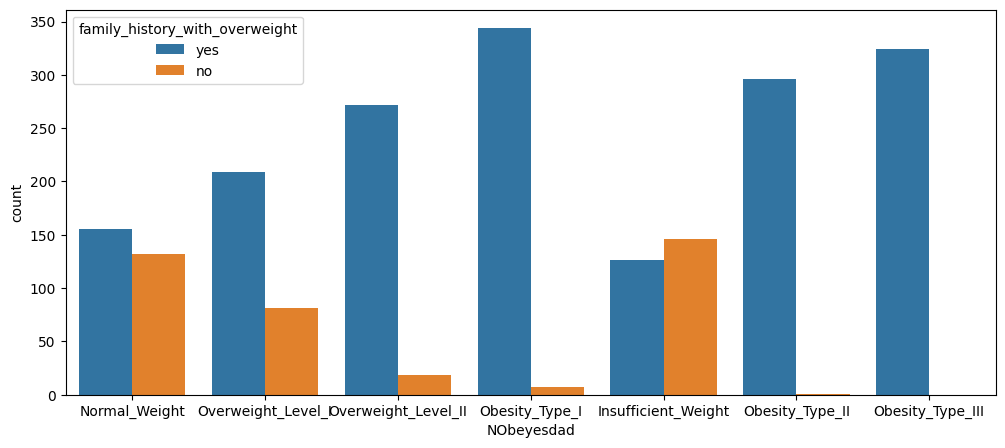

In [92]:
plt.figure(figsize = (12, 5))

sns.countplot(df['NObeyesdad'],hue = df['family_history_with_overweight'])

#### Overweight and high calories food

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='NObeyesdad', ylabel='count'>

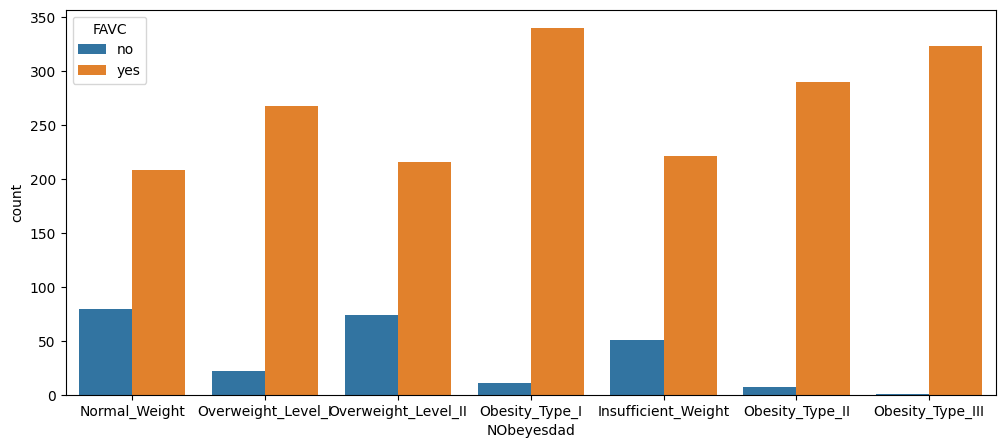

In [93]:
plt.figure(figsize = (12, 5))

sns.countplot(df['NObeyesdad'],hue = df['FAVC'])

#### Overweight and food between meals

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='NObeyesdad', ylabel='count'>

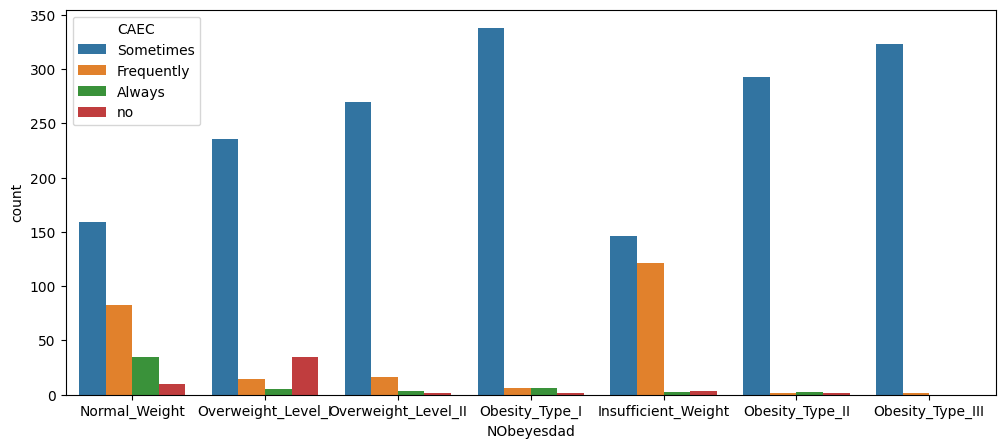

In [94]:
plt.figure(figsize = (12, 5))

sns.countplot(df['NObeyesdad'],hue = df['CAEC'])

#### Overweight and smoking

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='NObeyesdad', ylabel='count'>

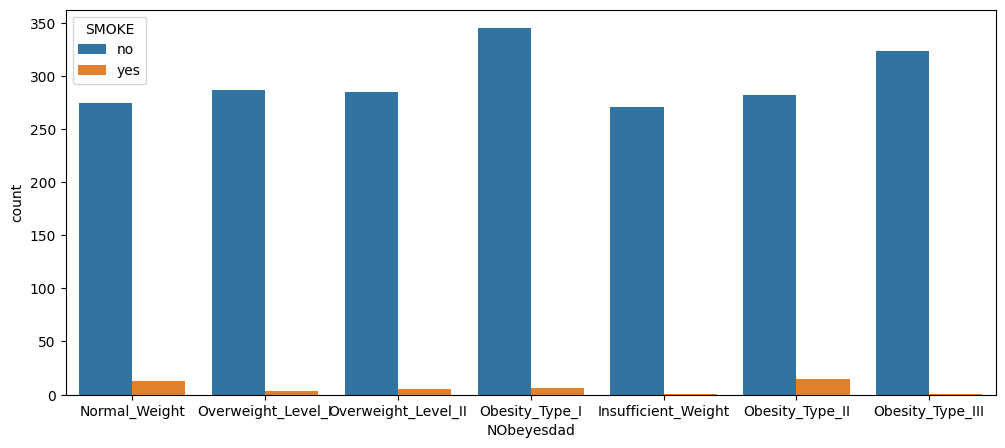

In [95]:
plt.figure(figsize = (12, 5))

sns.countplot(df['NObeyesdad'],hue = df['SMOKE'])

#### Overweight and monitoring calories

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='NObeyesdad', ylabel='count'>

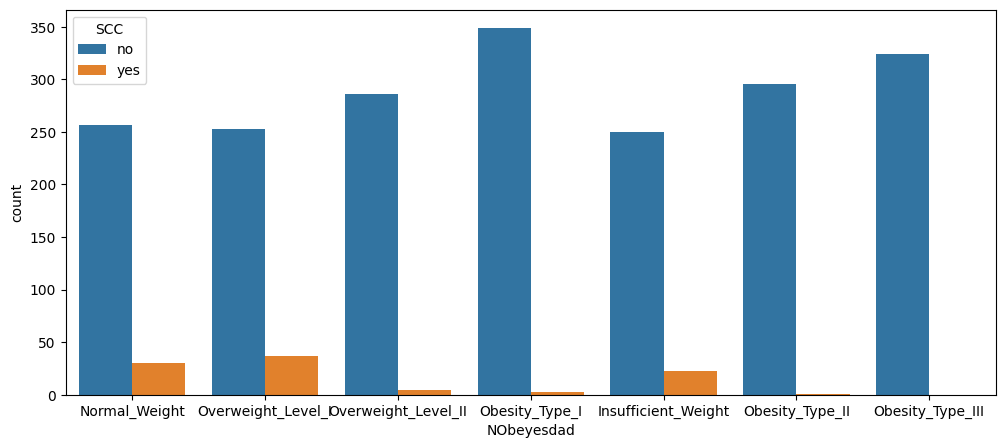

In [96]:
plt.figure(figsize = (12, 5))

sns.countplot(df['NObeyesdad'],hue = df['SCC'])

#### Overweight and alcohol

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='NObeyesdad', ylabel='count'>

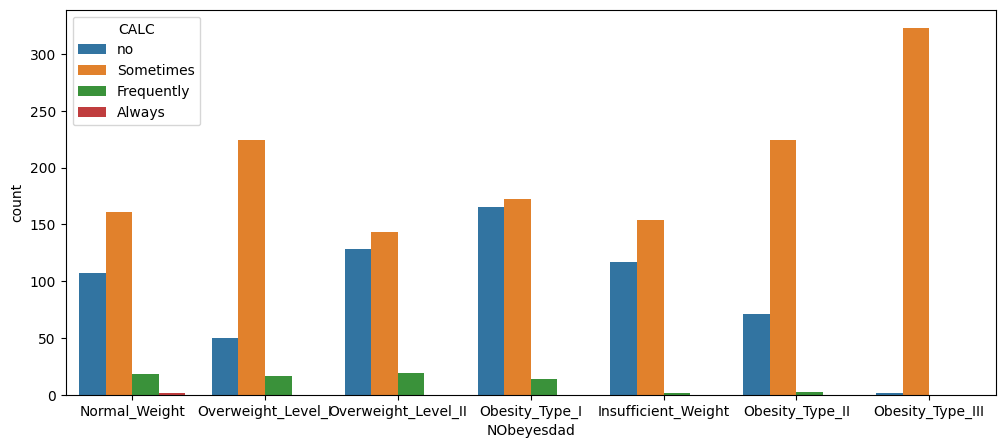

In [97]:
plt.figure(figsize = (12, 5))

sns.countplot(df['NObeyesdad'],hue = df['CALC'])

#### Overweight and means of transport

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='NObeyesdad', ylabel='count'>

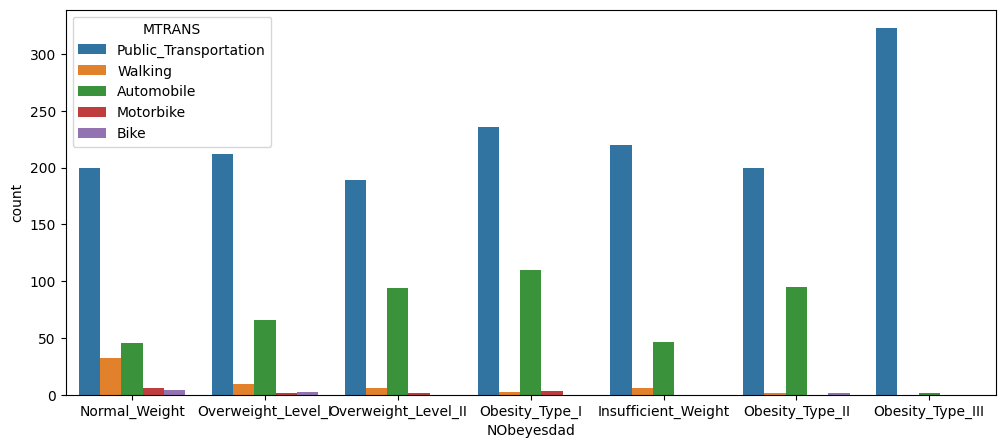

In [98]:
plt.figure(figsize = (12, 5))

sns.countplot(df['NObeyesdad'],hue = df['MTRANS'])

###  Statistics

In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,23.972525,6.308664,14.00,19.000000,22.000000,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


#### Segregating numeric and categorical features 

In [101]:
# numerical and categorical features

numerical_features =[i  for i in df.columns if df[i].dtype != 'O']

categorical_features = [i  for i in df.columns if df[i].dtype == 'O' ]

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


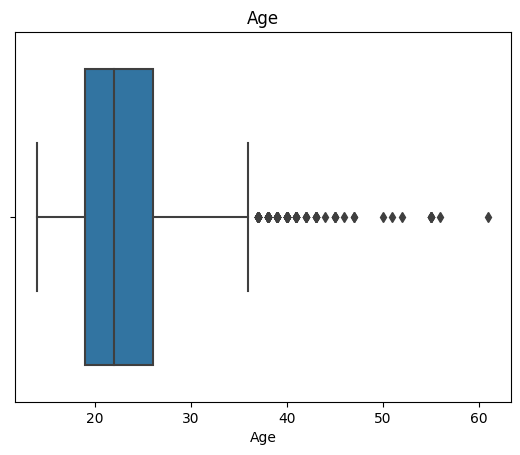

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


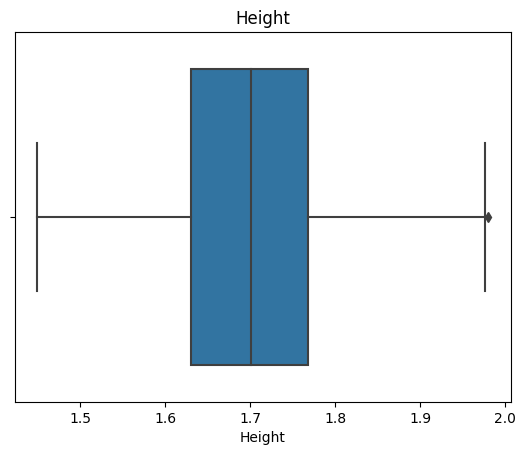

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


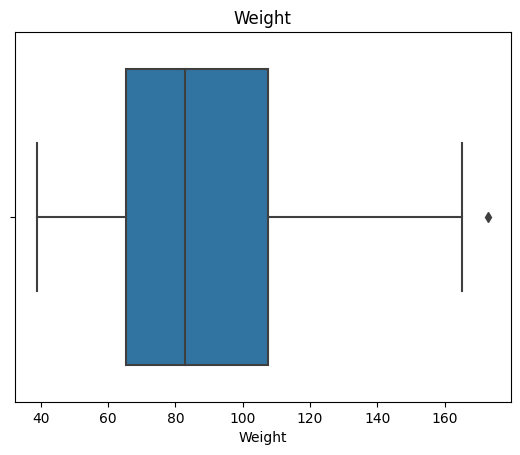

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


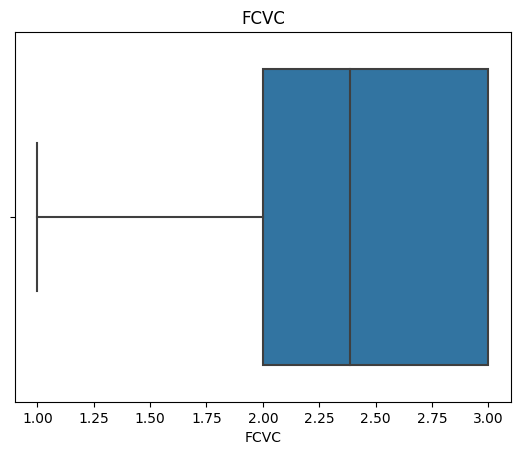

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


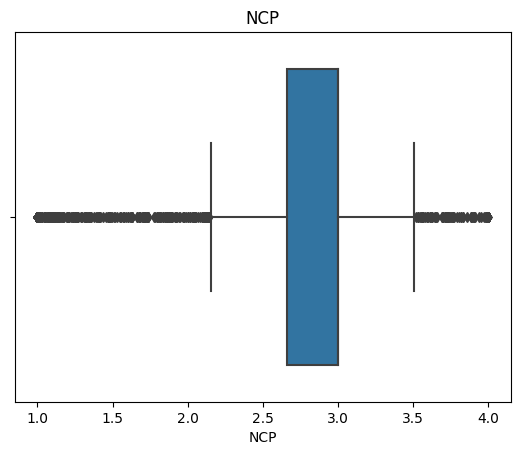

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


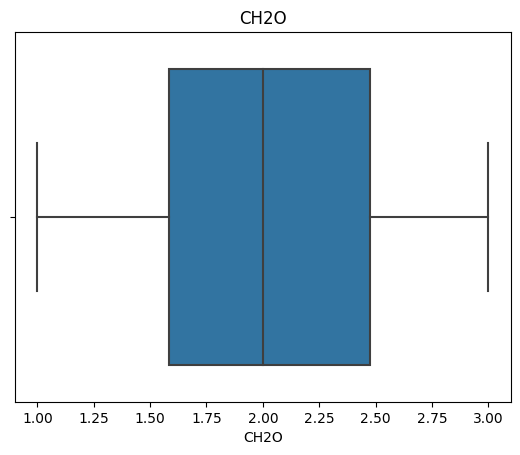

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


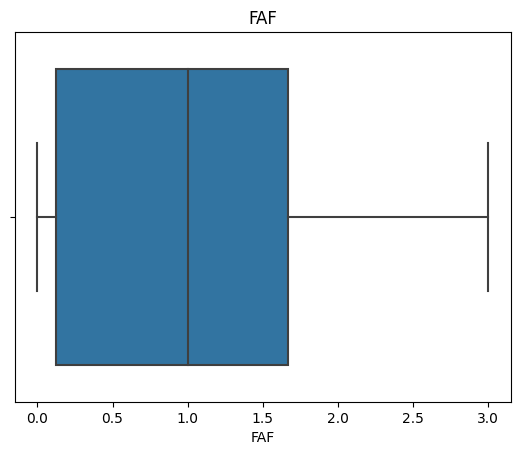

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


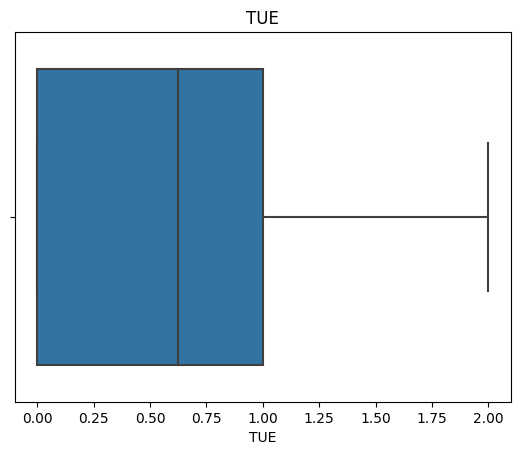

In [115]:
for i in numerical_features:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

#### Corelation 

<Axes: >

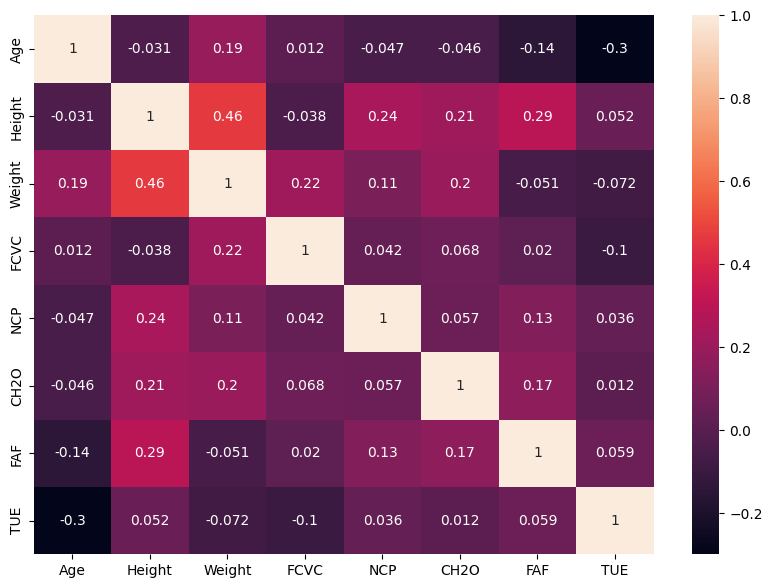

In [116]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot = True)

OBSERVATIONS:

* Obesity type III is more common in Female and Obesity type II in male.

* Between Age 15 to 40, the Obesity rate is higher.

* Person who doesn't smoke has much higher chance of obesity this leads to the conclusion that the data might be biased as around 97% of people doesn't smoke.

* A slight higher chance of obesity for men if they have a family history rather than women

* People who consumes alcohol sometimes will have higher chance of obesity

* There are almost an equal number of females and males in the dataset. Data is available for slightly more men than women but this does not make it imbalanced.

* Most of them replied Affirmative(1720) as obesity runs in their family, amoung them Male has slightly higher chance of obisity compared with Female.

* People using public transport has higher chance of getting Obesity but Mtrans Seams to be biased as Public_Transportation datas are more. So couldn't come to conclusion which impacts obesity
